## Task 4.10: Coding Etiquette & Excel Reporting [Part 1]

### Table of Contents:
1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook
2. Consider any security implications that might exist for this new data
3. Create a regional segmentation of the data
4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data
5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents
6. Create an appropriate visualization to show the distribution of profile
7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
8. Compare your customer profiles with regions and departments. Can you identify a link between them?
9. Produce suitable charts to illustrate your results and export them in your project folder
10. Tidy up your script, export your final data set, and save your notebook

## Task 01. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r'C:\Users\lance\Documents\Achievement 4 Project'

In [3]:
# Import Instacart dataset and define it as a dataframe
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
# Check shape of the newly imported data set
instacart.shape

(32399727, 34)

## Task 02. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis

Regarding personally identifiable information (PII), the following columns may pose secruity risks had the dataset not been publicly available: 'first_name', 'surname', 'age', 'marital_status', 'income', and 'state'. While each piece of data may not be able to identify a person on its own, data can often be cross-referenced with other available data to deduce the identity of an individual. This data should be handled in compliance with privacy laws and regulations. However, for the sake of the project we'll be dropping the 'first_name' and 'surname' columns.

In [34]:
# Drop the 'first_name' and 'surname' columns
included_customers_new = included_customers.drop(columns=['first_name', 'surname'])

## Task 03. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. Determine whether there’s a difference in spending habits between the different U.S. regions.

### Define regions

In [5]:
# Map each state to a region based on the U.S. Census Bureau,
state_region_mapping = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',

    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest',
    'Kansas': 'Midwest', 'Michigan': 'Midwest', 'Minnesota': 'Midwest',
    'Missouri': 'Midwest', 'Nebraska': 'Midwest', 'North Dakota': 'Midwest',
    'Ohio': 'Midwest', 'South Dakota': 'Midwest', 'Wisconsin': 'Midwest',

    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South',
    'Maryland': 'South', 'North Carolina': 'South', 'South Carolina': 'South',
    'Virginia': 'South', 'District of Columbia': 'South', 'West Virginia': 'South',
    'Alabama': 'South', 'Kentucky': 'South', 'Mississippi': 'South',
    'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    'Oklahoma': 'South', 'Texas': 'South',

    'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West',
    'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West',
    'Utah': 'West', 'Wyoming': 'West', 'Alaska': 'West',
    'California': 'West', 'Hawaii': 'West', 'Oregon': 'West',
    'Washington': 'West'
}

In [6]:
# Create a 'region' column based on the state
instacart['region'] = instacart['state'].map(state_region_mapping)

In [7]:
# Verify value counts in the 'region' column
instacart['region'].value_counts(dropna = False)

region
South        10790091
West          8291679
Midwest       7596065
Northeast     5721892
Name: count, dtype: int64

### Spending habits by region

In [8]:
# Create a crosstab for the 'spender_flag' column based on the 'region' column
regional_spending = pd.crosstab(instacart['region'], instacart['spender_flag'], dropna = False).sort_values(by = 'High_spender', ascending = False)

In [9]:
# View crosstab 
regional_spending

spender_flag,High_spender,Low_spender
region,,
South,40577,10749514
West,31238,8260441
Midwest,29265,7566800
Northeast,18639,5703253


## Task 04. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

### Flag 'low-activity' customers

In [10]:
# Define low-activity customers (less than 5 orders)
instacart.loc[instacart['max_order'] >=5, 'exclusion_flag'] = 'Included'
instacart.loc[instacart['max_order'] <5, 'exclusion_flag'] = 'Excluded'

In [11]:
# Check value counts in the 'exclusion_flag' column
instacart['exclusion_flag'].value_counts()

exclusion_flag
Included    30959687
Excluded     1440040
Name: count, dtype: int64

### Exclude 'low-activity' customers from the data

In [12]:
# Create a dataframe with excluded customers
excluded_customers = instacart[instacart['exclusion_flag'] == 'Excluded']

In [13]:
# Create a dataframe with included customers
included_customers = instacart[instacart['exclusion_flag'] == 'Included']

In [14]:
# Check if the sum of both dataframes is equal to the original
len(excluded_customers) + len(included_customers) == len(instacart)

True

### Export dataframe with 'included' customers

In [15]:
# Export the sample without 'excluded' customers
included_customers.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_merged_included'))

In [16]:
# Check the shape of the exported data
included_customers.shape

(30959687, 36)

## Task 05. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

### Create categories based on income

In [17]:
included_customers.loc[included_customers['income'] < 50000,'income_category'] = 'Low'
included_customers.loc[(included_customers['income'] >= 50000) & (included_customers['income']< 100000),'income_category'] = 'Middle'
included_customers.loc[included_customers['income']>= 100000,'income_category'] = 'High'

C:\Users\lance\AppData\Local\Temp\ipykernel_27540\764985865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  included_customers.loc[included_customers['income'] < 50000,'income_category'] = 'Low'


In [18]:
# Check values counts in the 'income_catgeory' column
included_customers['income_category'].value_counts()

income_category
High      14202788
Middle    13394345
Low        3362554
Name: count, dtype: int64

### Create categories based on age

In [19]:
included_customers.loc[included_customers['age']< 40,'age_type'] = 'Young Adult'
included_customers.loc[(included_customers['age'] >= 40) & (included_customers['age']< 65),'age_type'] = 'Middle Age'
included_customers.loc[included_customers['age']>= 65,'age_type'] = 'Senior'

C:\Users\lance\AppData\Local\Temp\ipykernel_27540\3990065104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  included_customers.loc[included_customers['age']< 40,'age_type'] = 'Young Adult'


In [20]:
# Check values counts in the 'age_type' column
included_customers['age_type'].value_counts()

age_type
Middle Age     12101980
Young Adult    10663440
Senior          8194267
Name: count, dtype: int64

### Create categories based on number of dependants

In [21]:
included_customers['dependant_status'] = 'No Dependants'
included_customers.loc[included_customers['n_dependants']> 0,'dependant_status'] = 'Has Dependants'

C:\Users\lance\AppData\Local\Temp\ipykernel_27540\1901619586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  included_customers['dependant_status'] = 'No Dependants'


In [22]:
# Check values counts in the 'dependant_status' column
included_customers['dependant_status'].value_counts()

dependant_status
Has Dependants    23221179
No Dependants      7738508
Name: count, dtype: int64

In [23]:
# Check columns
included_customers.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag,income_category,age_type,dependant_status
0,2539329,1,1,2,8,NaN,True,196,1,0,...,2/17/2019,3,married,40423,both,South,Included,Low,Young Adult,Has Dependants
1,2398795,1,2,3,7,15.0,False,196,1,1,...,2/17/2019,3,married,40423,both,South,Included,Low,Young Adult,Has Dependants
2,473747,1,3,3,12,21.0,False,196,1,1,...,2/17/2019,3,married,40423,both,South,Included,Low,Young Adult,Has Dependants
3,2254736,1,4,4,7,29.0,False,196,1,1,...,2/17/2019,3,married,40423,both,South,Included,Low,Young Adult,Has Dependants
4,431534,1,5,4,15,28.0,False,196,1,1,...,2/17/2019,3,married,40423,both,South,Included,Low,Young Adult,Has Dependants


### Create a profiling variable based on age, marital status and dependant status

In [24]:
# Create classifications for a 'young adult'
included_customers.loc[(included_customers['dependant_status'] == 'No Dependants') & (included_customers['age_type'] =='Young Adult') & (included_customers['marital_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] ='Single Young Adult'
included_customers.loc[(included_customers['dependant_status'] == 'No Dependants') & (included_customers['age_type'] =='Young Adult') & (included_customers['marital_status'] == 'married'),'age_dependants_type'] = 'Married Young Adult'
included_customers.loc[(included_customers['dependant_status'] == 'Has Dependants') & (included_customers['age_type'] =='Young Adult') & (included_customers['marital_status'] == 'married'),'age_dependants_type'] = 'Married Young Parent'
included_customers.loc[(included_customers['dependant_status'] == 'Has Dependants') & (included_customers['age_type'] =='Young Adult') & (included_customers['marital_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] = 'Single Young Parent'

C:\Users\lance\AppData\Local\Temp\ipykernel_27540\4242720183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  included_customers.loc[(included_customers['dependant_status'] == 'No Dependants') & (included_customers['age_type'] =='Young Adult') & (included_customers['marital_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] ='Single Young Adult'


In [25]:
# Create classifications for a 'middle aged adult'
included_customers.loc[(included_customers['dependant_status'] == 'No Dependants') & (included_customers['age_type'] =='Middle Age') & (included_customers['marital_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] ='Single Middle Aged Adult'
included_customers.loc[(included_customers['dependant_status'] == 'No Dependants') & (included_customers['age_type'] =='Middle Age') & (included_customers['marital_status'] == 'married'),'age_dependants_type'] = 'Married Middle Aged Adult'
included_customers.loc[(included_customers['dependant_status'] == 'Has Dependants') & (included_customers['age_type'] =='Middle Age') & (included_customers['marital_status'] == 'married'),'age_dependants_type'] = 'Married Middle Aged Parent'
included_customers.loc[(included_customers['dependant_status'] == 'Has Dependants') & (included_customers['age_type'] =='Middle Age') & (included_customers['marital_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] = 'Single Middle Aged Parent'

In [26]:
# Create classifications for a 'senior adult'
included_customers.loc[(included_customers['dependant_status'] == 'No Dependants') & (included_customers['age_type'] =='Senior') & (included_customers['marital_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] ='Single Senior Adult'
included_customers.loc[(included_customers['dependant_status'] == 'No Dependants') & (included_customers['age_type'] =='Senior') & (included_customers['marital_status'] == 'married'),'age_dependants_type'] = 'Married Senior Adult'
included_customers.loc[(included_customers['dependant_status'] == 'Has Dependants') & (included_customers['age_type'] =='Senior') & (included_customers['marital_status'] == 'married'),'age_dependants_type'] = 'Married Senior Parent'
included_customers.loc[(included_customers['dependant_status'] == 'Has Dependants') & (included_customers['age_type'] =='Senior') & (included_customers['marital_status'].isin(['single','divorced/widowed','living with parents and siblings'])),'age_dependants_type'] = 'Single Senior Parent'

In [27]:
# Check values counts in the 'dependant_status' column
included_customers['age_dependants_type'].value_counts()

age_dependants_type
Married Middle Aged Parent    9045278
Married Young Parent          6522259
Married Senior Parent         6172663
Single Middle Aged Adult      3056702
Single Young Adult            2660202
Single Senior Adult           2021604
Single Young Parent           1480979
Name: count, dtype: int64

## Task 06. Create an appropriate visualization to show the distribution of profiles.

### Income distribution visualization

In [28]:
# Group income distribution figures into one subset
income_viz = included_customers['income_category'].value_counts()

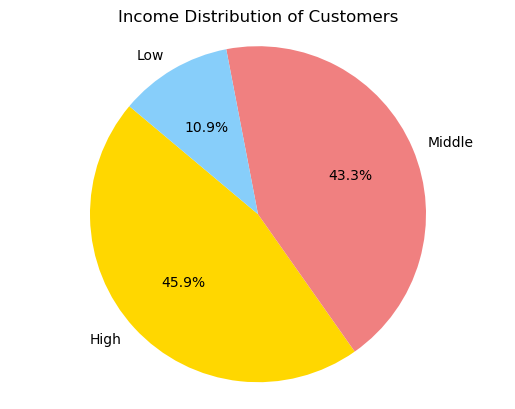

In [29]:
# Plot a pie chart showing income distribution
plt.pie(income_viz, labels=income_viz.index, colors=['gold', 'lightcoral', 'lightskyblue'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')

# Add title to pie chart
plt.title('Income Distribution of Customers')   

# Save figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','income_distribution_customers.png'))

### Age distribution visualization

In [30]:
# Group age distribution figures into one subset
age_viz = included_customers['age_type'].value_counts()

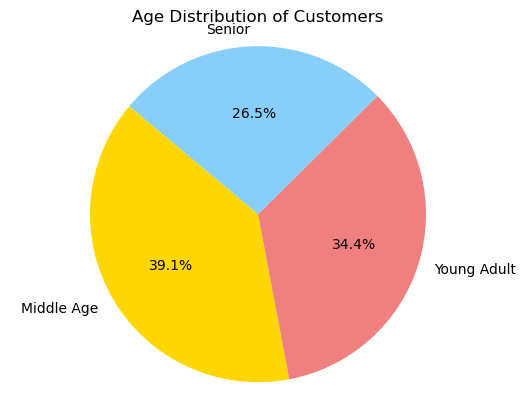

In [31]:
# Plot a pie chart showing age distribution
plt.pie(age_viz, labels=age_viz.index, colors=['gold', 'lightcoral', 'lightskyblue'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')

# Add title to the pie chart
plt.title('Age Distribution of Customers')   

# Save figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','age_distribution_customers.png'))

### Dependant distribution of the customer profile variable

In [32]:
# Group age distribution figures into one subset
profile_viz = included_customers['age_dependants_type'].value_counts()

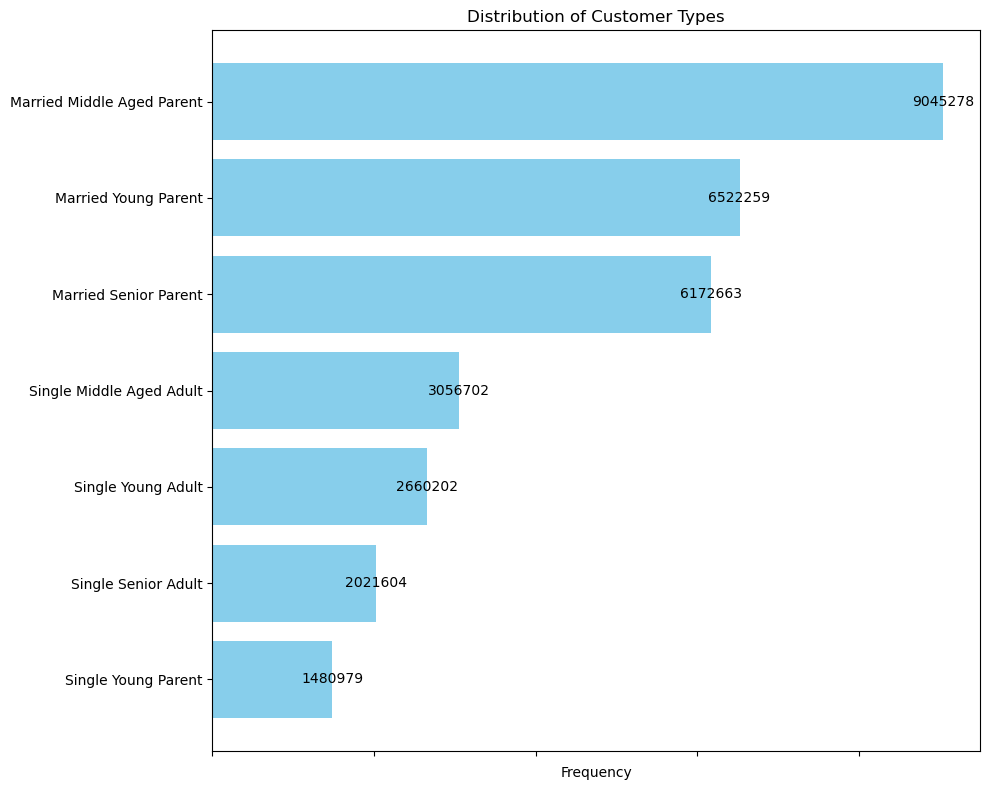

In [79]:
# Setup figure and axis
fig, ax = plt.subplots(figsize=(10, 8)) 

# Create horizontal bar chart
bars = ax.barh(profile_viz.index, profile_viz, color='skyblue')

# Display the frequency as text within the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, '{:.0f}'.format(width),
            ha='center', va='center')

# Add title and labels
ax.set_title('Distribution of Customer Types')
ax.set_xlabel('Frequency')

# Remove x-axis ticks
ax.xaxis.set_major_formatter(plt.NullFormatter())

# Invert the y-axis to have the highest frequency on top
ax.invert_yaxis()

# Adjust the layout to make sure everything fits without being cut off
plt.tight_layout()

# Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','customer_profile_distribution.png'), bbox_inches='tight')

## Task 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### Create a 'total_expenditure' column to track expenditure per user id

In [28]:
# Create a new column 'total_expenditure' to calculate sum of purchases for each user id
included_customers['total_expenditure']= included_customers.groupby('user_id')['prices'].transform(sum)

C:\Users\lance\AppData\Local\Temp\ipykernel_27540\3280554719.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  included_customers['total_expenditure']= included_customers.groupby('user_id')['prices'].transform(sum)
C:\Users\lance\AppData\Local\Temp\ipykernel_27540\3280554719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  included_customers['total_expenditure']= included_customers.groupby('user_id')['prices'].transform(sum)


In [29]:
# View new column
included_customers.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,marital_status,income,_merge,region,exclusion_flag,income_category,age_type,dependant_status,age_dependants_type,total_expenditure
0,2539329,1,1,2,8,NaN,True,196,1,0,...,married,40423,both,South,Included,Low,Young Adult,Has Dependants,Married Young Parent,375.7
1,2398795,1,2,3,7,15.0,False,196,1,1,...,married,40423,both,South,Included,Low,Young Adult,Has Dependants,Married Young Parent,375.7
2,473747,1,3,3,12,21.0,False,196,1,1,...,married,40423,both,South,Included,Low,Young Adult,Has Dependants,Married Young Parent,375.7
3,2254736,1,4,4,7,29.0,False,196,1,1,...,married,40423,both,South,Included,Low,Young Adult,Has Dependants,Married Young Parent,375.7
4,431534,1,5,4,15,28.0,False,196,1,1,...,married,40423,both,South,Included,Low,Young Adult,Has Dependants,Married Young Parent,375.7


In [30]:
expenditure = included_customers['total_expenditure']

In [31]:
expenditure

0           375.7
1           375.7
2           375.7
3           375.7
4           375.7
            ...  
32399718    278.2
32399719    278.2
32399720    278.2
32399721    278.2
32399722    278.2
Name: total_expenditure, Length: 30959687, dtype: float64

### Aggregate the max, mean, and min variables based on customer profiles for usage frequency and expenditure

In [32]:
included_customers.groupby('age_dependants_type').agg({'total_expenditure': ['mean', 'min', 'max'], 'order_number': ['mean', 'min', 'max']})

total_expenditure                order_number      \
                                        mean   min      max         mean min   
age_dependants_type                                                            
Married Middle Aged Parent       3377.601115  10.4  21509.2    17.713884   1   
Married Senior Parent            3398.312239   6.8  26394.9    17.768506   1   
Married Young Parent             3473.051182   7.0  22696.9    17.879328   1   
Single Middle Aged Adult         3511.158217   5.0  24307.1    18.208838   1   
Single Senior Adult              3366.690311  15.7  17519.6    17.836024   1   
Single Young Adult               3379.540645  10.5  18883.2    17.763240   1   
Single Young Parent              3459.701150  14.4  16048.1    18.000750   1   

                                
                           max  
age_dependants_type             
Married Middle Aged Parent  99  
Married Senior Parent       99  
Married Young Parent        99  
Single Middle Aged Adult    99  
Single Senior Adult         99  
Single Young Adult          99  
Single Young Parent         99

## Task 08. Compare your customer profiles with regions and departments.

### Regional comparison

In [33]:
# Group the customer profiles and regions
profile_region_distribution = included_customers.groupby(['region', 'age_dependants_type']).size().reset_index(name='count')

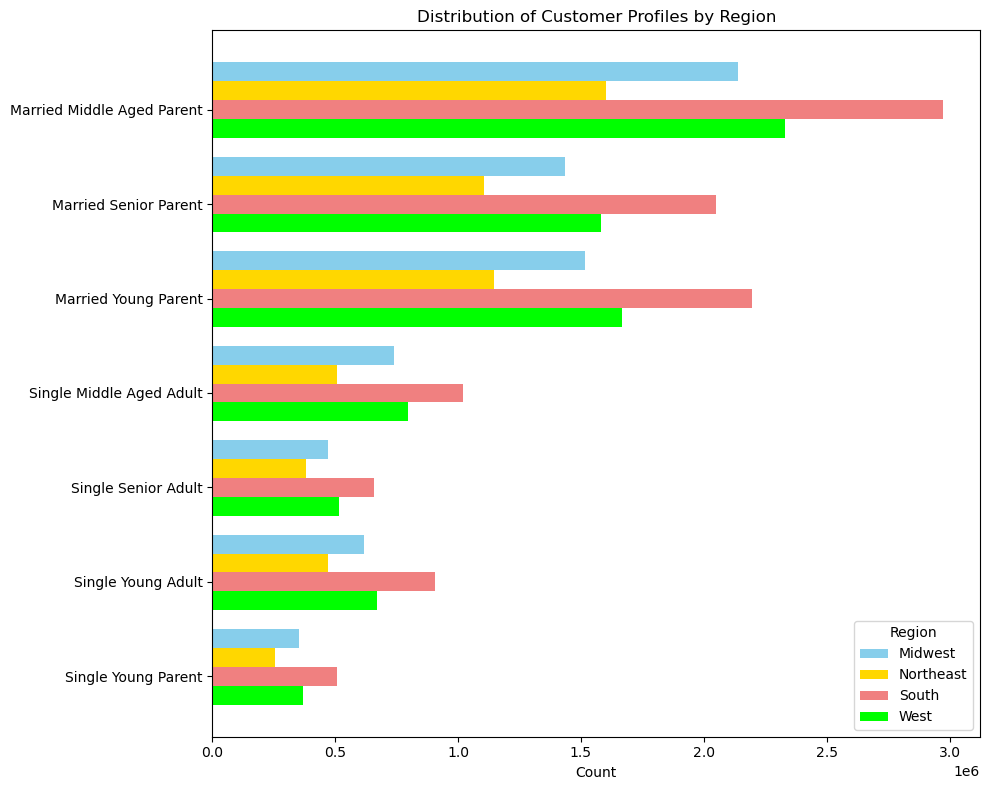

In [84]:
# Define colors for each region
region_colors = {
    'Northeast': 'gold',
    'Midwest': 'skyblue',
    'South': 'lightcoral',
    'West': 'lime'
}

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# The number of regions
num_regions = len(profile_region_distribution['region'].unique())
# The width of each bar
bar_width = 1 / (num_regions + 1)

# Create an array with the position of each age_dependants_type
age_dependants_positions = np.arange(len(profile_region_distribution['age_dependants_type'].unique()))

# Plot a bar for each region within each customer profile group
for i, region in enumerate(profile_region_distribution['region'].unique()):
    # Get the subset for the current region
    region_subset = profile_region_distribution[profile_region_distribution['region'] == region]
    # Sort the 'age_dependants_type' categories consistently if needed
    region_subset = region_subset.sort_values('age_dependants_type')
    # Calculate each bar's position
    positions = age_dependants_positions - (bar_width * num_regions / 2) + (i * bar_width)
    # Plot bars with the assigned color
    ax.barh(positions, region_subset['count'], 
            height=bar_width, color=region_colors[region], label=region)

# Add title and axis labels
ax.set_title('Distribution of Customer Profiles by Region')
ax.set_xlabel('Count')
ax.set_yticks(age_dependants_positions)
ax.set_yticklabels(region_subset['age_dependants_type'])

# Reverse the y-axis order
plt.gca().invert_yaxis()

# Add the legend
ax.legend(title='Region')

# Adjust the layout to make sure everything fits without being cut off
plt.tight_layout()

# Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','regional_profile_distribution.png'), bbox_inches='tight')

### Department comparison

In [41]:
# Group the customer profiles and department ids
profile_department_distribution = included_customers.groupby(['age_dependants_type', 'department_id']).size().unstack(fill_value=0)

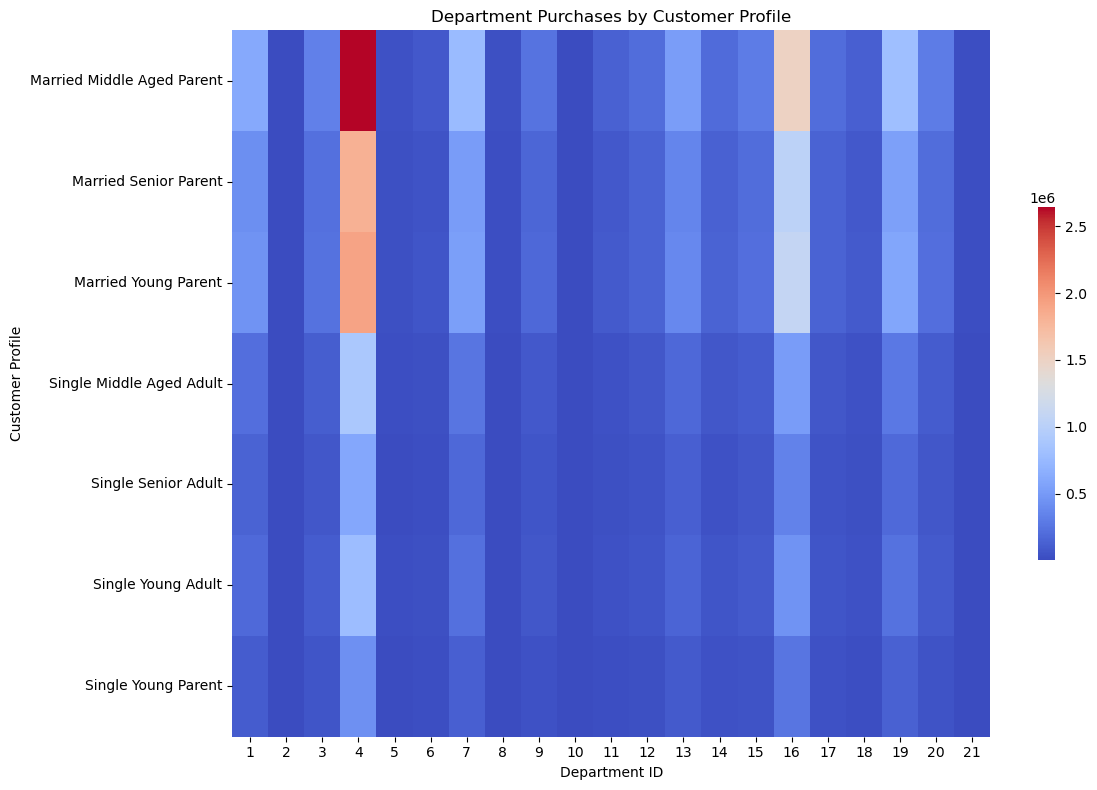

In [83]:
# Plot the heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(profile_department_distribution, annot=False, fmt='.0f', cmap='coolwarm', cbar_kws={'shrink': 0.5})
plt.title('Department Purchases by Customer Profile')
plt.xlabel('Department ID')
plt.ylabel('Customer Profile')

# Adjust the layout to make sure everything fits without being cut off
plt.tight_layout()

# Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','department_profile_distribution.png'), bbox_inches='tight')

### Regional department sales

In [43]:
# Create a crosstab table for the heatmap
purchase_frequency = pd.crosstab(included_customers['region'],included_customers['department_id'])

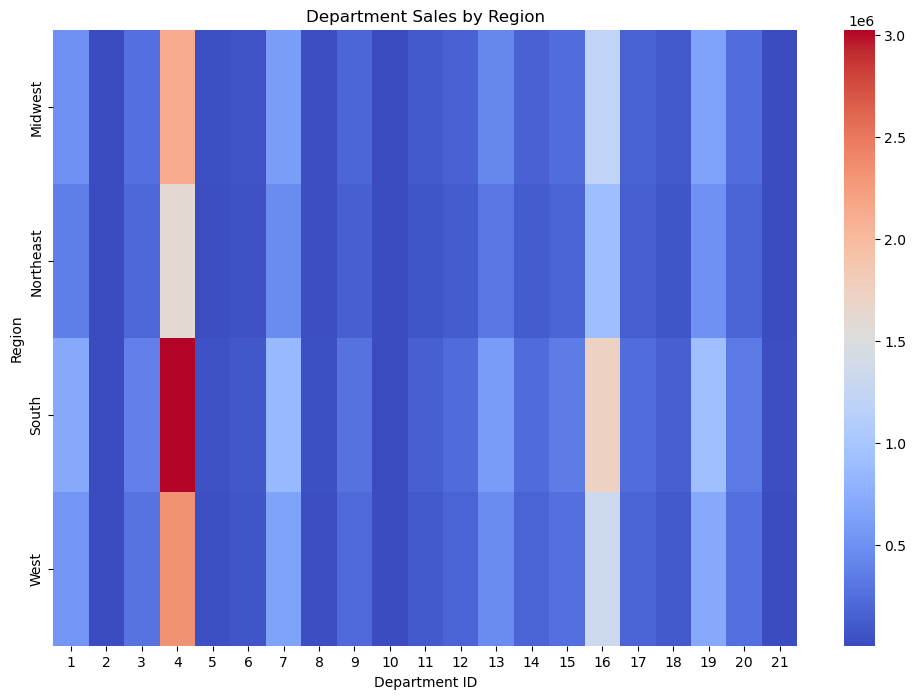

In [44]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(purchase_frequency, annot=False, fmt='d', cmap='coolwarm')
plt.title('Department Sales by Region')
plt.xlabel('Department ID')
plt.ylabel('Region')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','department_regional_sales.png'))

### Department sales by loyalty flag

In [45]:
# Create a crosstab table for the heatmap
loyalty_departments = pd.crosstab(included_customers['loyalty_flag'],included_customers['department_id'])

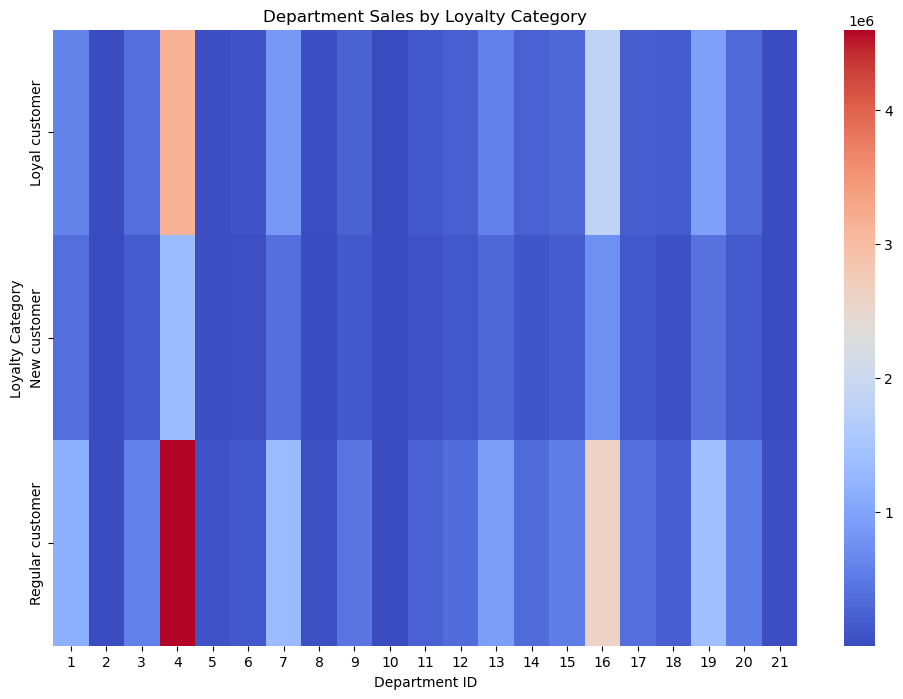

In [46]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loyalty_departments, annot=False, fmt='d', cmap='coolwarm')
plt.title('Department Sales by Loyalty Category')
plt.xlabel('Department ID')
plt.ylabel('Loyalty Category')
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','department_loyalty_sales.png'))

## Task 09. Produce suitable charts to illustrate your results and export them in your project folder.

### Order frequency throughout the week 

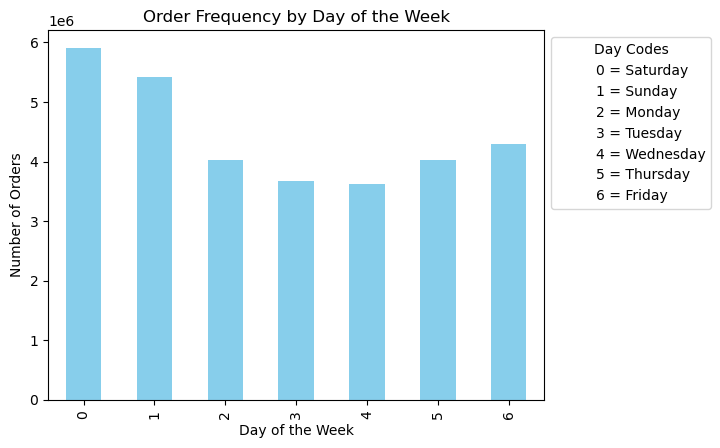

In [51]:
# Plot the bar chart
fig, ax = plt.subplots()
order_counts = included_customers['orders_day_of_week'].value_counts().sort_index()
bars = order_counts.plot(kind='bar', ax=ax, color='skyblue')

# Add labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Orders')
ax.set_title('Order Frequency by Day of the Week')
ax.set_xticks(range(7))

# Define a custom legend that maps numbers to days
# Define a custom legend that maps numbers to days
day_mapping = ['0 = Saturday', '1 = Sunday', '2 = Monday', '3 = Tuesday', '4 = Wednesday', '5 = Thursday', '6 = Friday']
# Create a legend for the mapping. Use a placeholder object (e.g., a Line2D instance) as the handle.
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='w', lw=4, label=day) for day in day_mapping]
ax.legend(handles=legend_elements, title="Day Codes", loc='upper right', bbox_to_anchor=(1.35, 1))

#Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','order_frequency_by_day.png'))

### Order frequency throughout the day

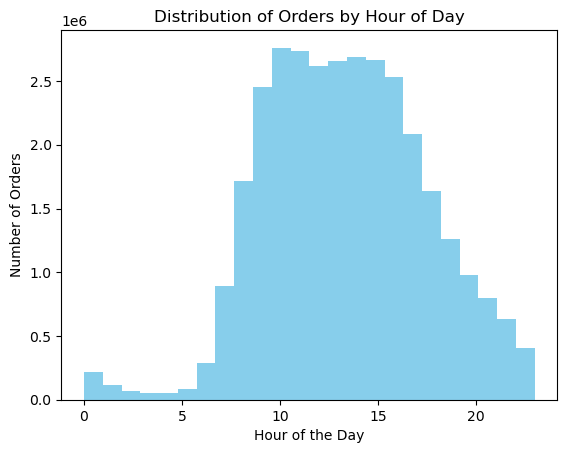

In [52]:
# Create a histogram
hist = instacart['order_hour_of_day'].plot.hist(bins=24, color='skyblue')

# Add a title and labels to the histogram
hist.set_title('Distribution of Orders by Hour of Day')
hist.set_xlabel('Hour of the Day')
hist.set_ylabel('Number of Orders')

# Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','order_frequency_by_hour.png'))

### Average price per item throughout the week

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


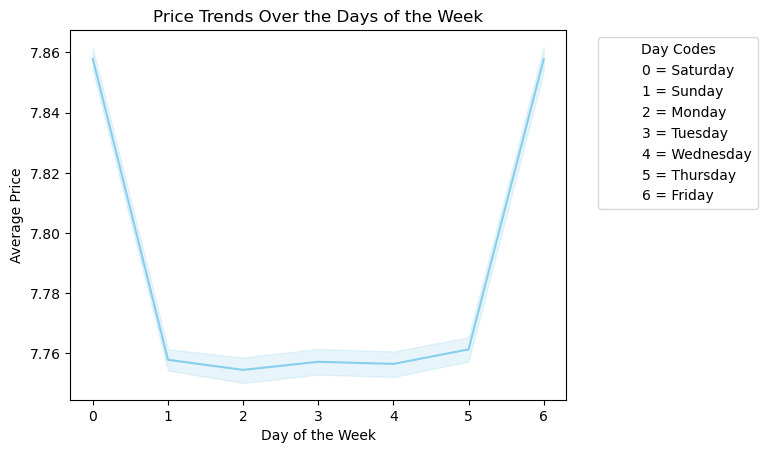

In [54]:
# Create the line plot
sns.lineplot(data=included_customers, x='orders_day_of_week', y='prices', color='skyblue')

# Add a title and labels to the plot
plt.title('Price Trends Over the Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')

# Define a custom legend that maps numbers to days
day_mapping = ['0 = Saturday', '1 = Sunday', '2 = Monday', '3 = Tuesday', '4 = Wednesday', '5 = Thursday', '6 = Friday']
legend_elements = [Line2D([0], [0], color='w', lw=4, label=day) for day in day_mapping]  # Invisible lines for legend
plt.legend(handles=legend_elements, title="Day Codes", bbox_to_anchor=(1.05, 1), loc='upper left')

# Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','price_days_of_weekr.png'))

### Average price per item throughout the day

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


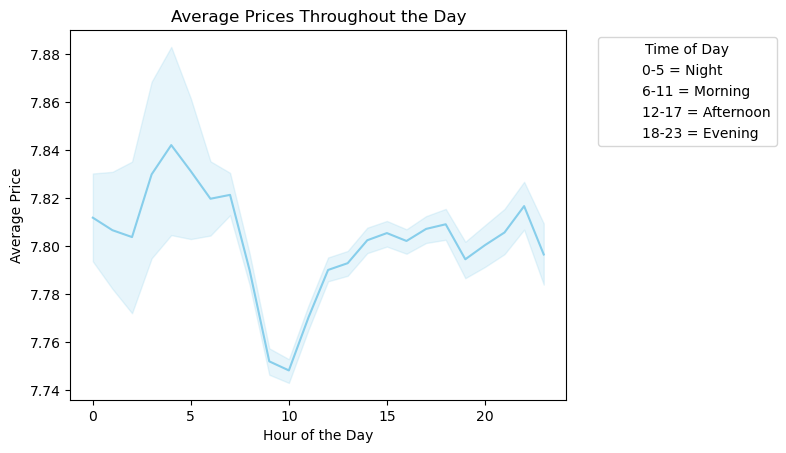

In [66]:
# Create the line plot with Seaborn
sns.lineplot(data=included_customers, x='order_hour_of_day', y='prices', color='skyblue')

# Add a title and labels to the plot
plt.title('Average Prices Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')

# Define a custom legend that maps numbers to parts of the day
time_mapping = ['0-5 = Night', '6-11 = Morning', '12-17 = Afternoon', '18-23 = Evening']
legend_elements = [Line2D([0], [0], color='w', lw=4, label=time) for time in time_mapping]  
plt.legend(handles=legend_elements, title="Time of Day", bbox_to_anchor=(1.05, 1), loc='upper left')

# Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','price_hour_of_day.png'))

### Number of orders per department

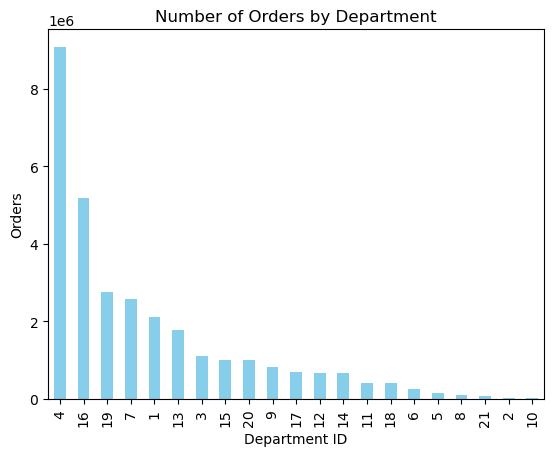

In [65]:
# Plot the bar chart
fig, ax = plt.subplots()
included_customers['department_id'].value_counts().sort_values(ascending=False).plot(kind='bar', ax=ax, color='skyblue')

# Add labels and title
ax.set_xlabel('Department ID')
ax.set_ylabel('Orders')
ax.set_title('Number of Orders by Department')

# Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_by_department.png'))

### Price category grouping

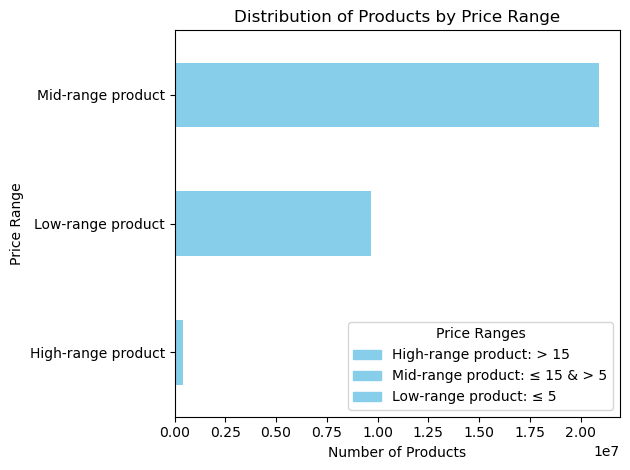

In [78]:
# Count the frequency of each price range
price_range_counts = included_customers['price_range_loc'].value_counts()

# Plotting the data as a horizontal bar chart
fig, ax = plt.subplots()
price_range_counts.plot(kind='barh', ax=ax, color='skyblue')

# Add labels and title
ax.set_xlabel('Number of Products')
ax.set_ylabel('Price Range')
ax.set_title('Distribution of Products by Price Range')

# Reverse the categories so the highest count is at the top
ax.invert_yaxis()

# Create a legend for the price ranges
price_labels = [
    'High-range product: > 15',
    'Mid-range product: ≤ 15 & > 5',
    'Low-range product: ≤ 5'
]
legend_elements = [plt.Rectangle((0,0),1,1, color='skyblue', label=price) for price in price_labels]
ax.legend(handles=legend_elements, title="Price Ranges")

# Adjust the layout to make sure everything fits without being cut off
plt.tight_layout()

# Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','price_category_grouping.png'), bbox_inches='tight')

### Price distribution

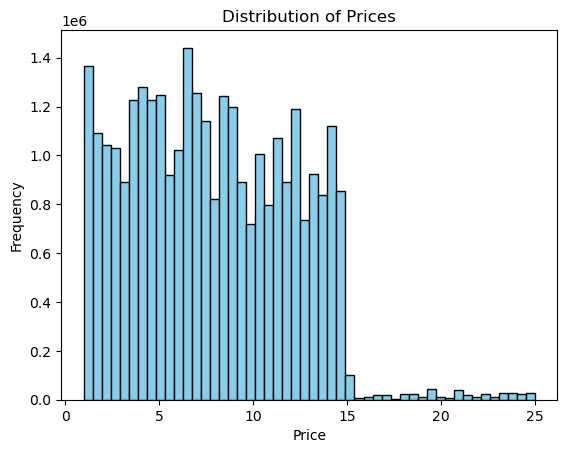

In [67]:
# Create a histogram
plt.hist(included_customers['prices'], bins=50, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')

# Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','price_distribution.png'))

### Regional spending habits

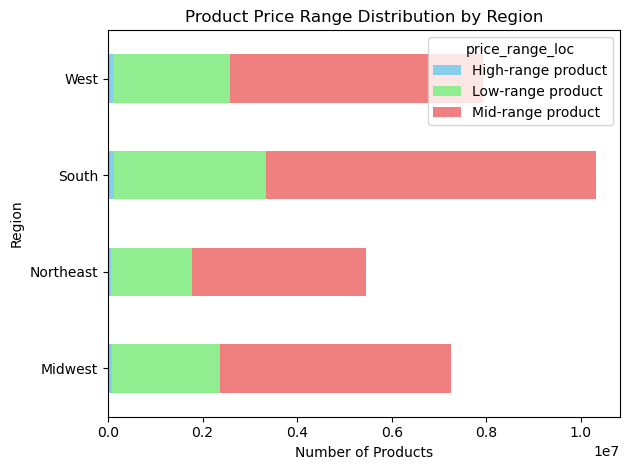

In [81]:
# Create a crosstab of the number of products in each price range by region
crosstab = pd.crosstab(included_customers['region'], included_customers['price_range_loc'])

# Plot a horizontal stacked bar chart
crosstab.plot(kind='barh', stacked=True, color=['skyblue', 'lightgreen', 'lightcoral'])

# Add labels and title
plt.xlabel('Number of Products')
plt.ylabel('Region')
plt.title('Product Price Range Distribution by Region')

# Adjust the layout to make sure everything fits without being cut off
plt.tight_layout()

# Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','regional_spending_habits.png'), bbox_inches='tight')

### Loyalty status spending habits

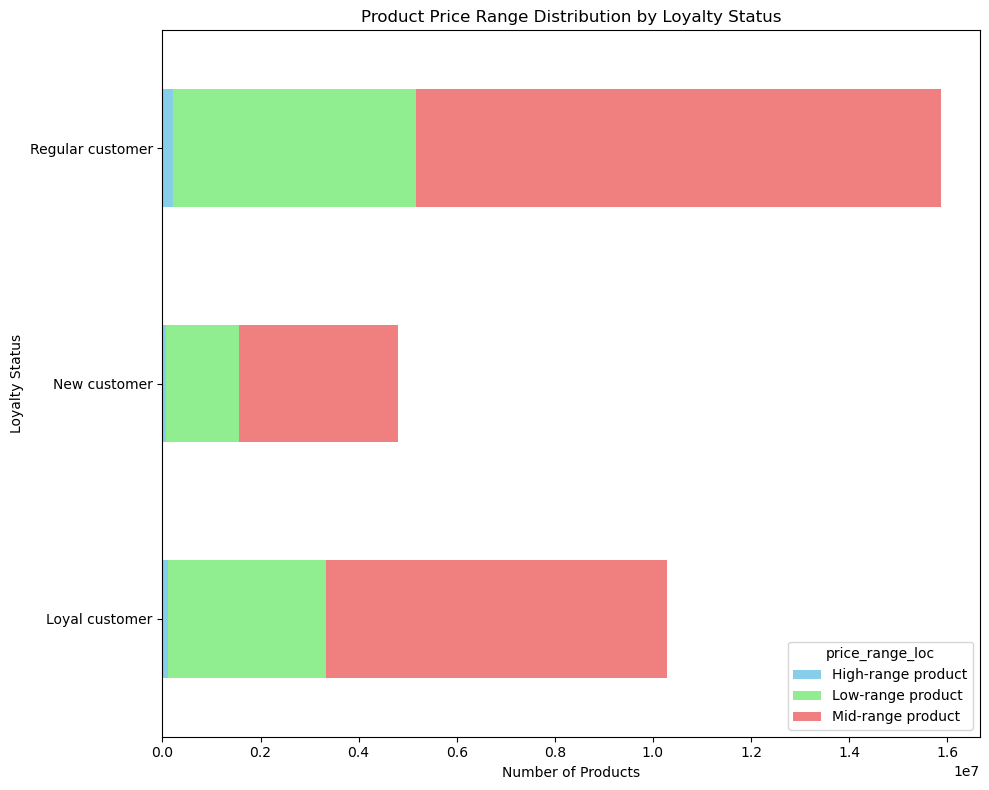

In [80]:
# Create a crosstab of the number of products in each price range by loyalty flag
crosstab = pd.crosstab(included_customers['loyalty_flag'], included_customers['price_range_loc'])

# Plot a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))
crosstab.plot(kind='barh', stacked=True, color=['skyblue', 'lightgreen', 'lightcoral'], ax=ax)

# Add labels and title
ax.set_xlabel('Number of Products')
ax.set_ylabel('Loyalty Status')
ax.set_title('Product Price Range Distribution by Loyalty Status')

# Adjust the layout to make sure everything fits without being cut off
plt.tight_layout()

# Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_spending_habits.png'), bbox_inches='tight')

### Different customer profiles spending habits

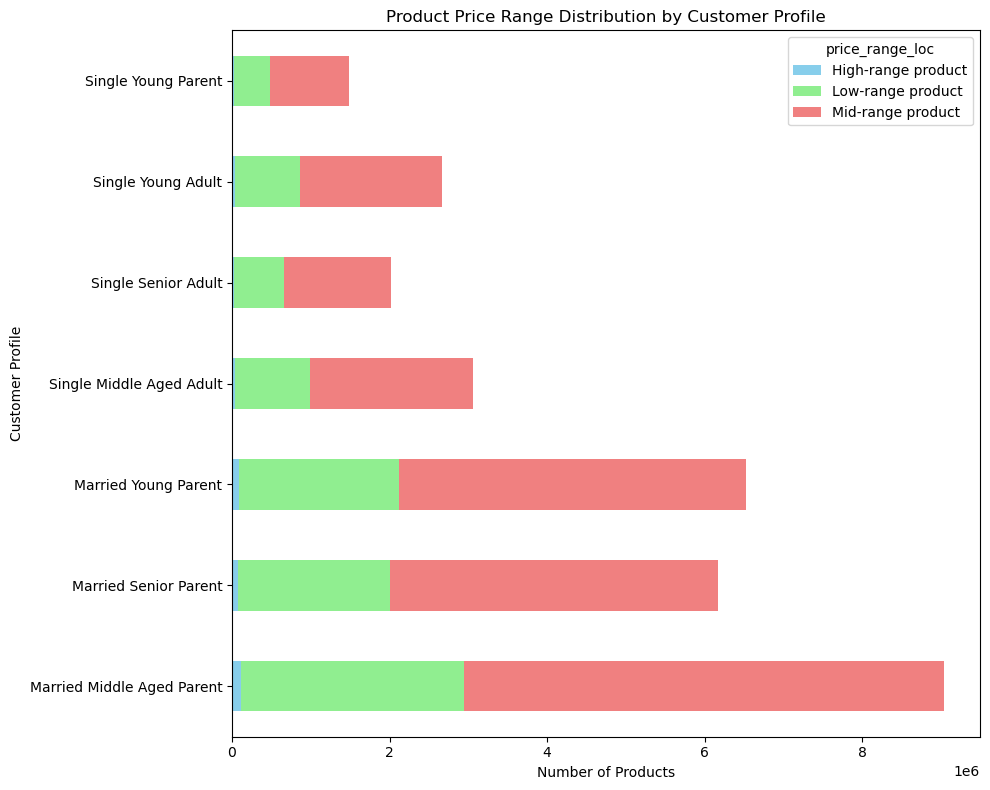

In [82]:
# Create a crosstab of the number of products in each price range by age_dependants_type
crosstab = pd.crosstab(included_customers['age_dependants_type'], included_customers['price_range_loc'])

# Plot a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))
crosstab.plot(kind='barh', stacked=True, color=['skyblue', 'lightgreen', 'lightcoral'], ax=ax)

# Add labels and title
ax.set_xlabel('Number of Products')
ax.set_ylabel('Customer Profile')
ax.set_title('Product Price Range Distribution by Customer Profile')

# Adjust the layout to make sure everything fits without being cut off
plt.tight_layout()

# Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','profile_spending_habits.png'), bbox_inches='tight')

### Relationship between age and family situation

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


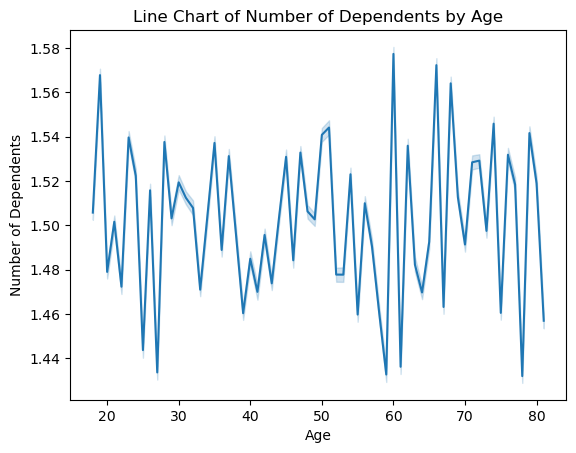

In [91]:
# Create a line chart 
sns.lineplot(data = included_customers, x = 'age',y = 'n_dependants')

# Add title and labels
plt.title('Line Chart of Number of Dependents by Age')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')

# Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','age_dependants_relationship.png'))

### Relationship between age and income

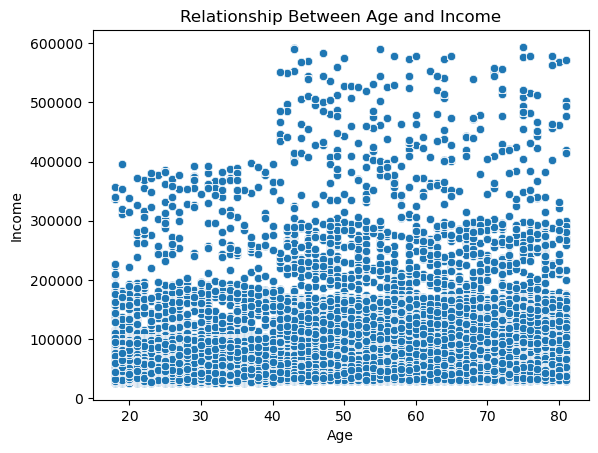

In [92]:
# Create a scatterplot
sns.scatterplot(x='age', y='income', data=included_customers)

# Setting the title and labels for the axes
plt.title('Relationship Between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')

# Export figure
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','age_income_relationship.png'))

## Task 10. Tidy up your script, export your final data set, and save your notebook

In [35]:
# Check dataframe shape
included_customers_new.shape

(30959687, 39)

In [37]:
# Export final data set
included_customers_new.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'final_data_set.pkl'))